In [4]:
import pandas as pd  
import collections
import numpy as np
from textblob import TextBlob # pip install -U textblob, python -m textblob.download_corpora
from textblob.classifiers import NaiveBayesClassifier
import nltk # pip install nltk, python -m textblob.download_corpora
from nltk.sentiment import SentimentIntensityAnalyzer
from transformers import pipeline # pip install -q transformers
import matplotlib.pyplot as plt

# making dataframe
df = pd.read_csv("data/sentiment140_with_location.csv", names=['target','id','date','flag','user','text', 'location'])  

df

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/transformers/utils/generic.py:311: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


,target,id,date,flag,user,text,location
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",China
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,Dominican Republic
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,Germany
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,Brazil
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",Argentina
...,...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...,Japan
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...,Spain
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...,Nigeria
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...,Argentina


In [5]:
# split dataset
shuffled = df.sample(frac = 1)
result = np.array_split(shuffled, 8)
split_df = result[0]
split_df

,target,id,date,flag,user,text,location
51958,0,1679211444,Sat May 02 08:48:31 PDT 2009,NO_QUERY,Dr_MickeyMouse,Was listening to Lauryn Hill-I Got Find Peace ...,Thailand
82723,0,1753147818,Sun May 10 00:19:36 PDT 2009,NO_QUERY,em2508,Fucking pissed off,France
1096755,4,1970339063,Sat May 30 03:27:33 PDT 2009,NO_QUERY,britishgirlsoph,watching take the lead ft @taylajade yummy cho...,USA
1212236,4,1989230415,Mon Jun 01 00:47:54 PDT 2009,NO_QUERY,mszulc,@spaulds wake up and answer my emails first then,Egypt
1447483,4,2062626062,Sat Jun 06 23:47:36 PDT 2009,NO_QUERY,Whookhie_BDB,@MistressLorelei very pleasant to lay my eyes ...,Egypt
...,...,...,...,...,...,...,...
768606,0,2301054333,Tue Jun 23 14:56:26 PDT 2009,NO_QUERY,mizsprieta,Somebody needs to figure out how to unlock the...,Cuba
825217,4,1556426097,Sat Apr 18 22:47:30 PDT 2009,NO_QUERY,Lurquer,@iPenginBrijhe - the very nice @WiltingSoul is...,Kenya
981120,4,1834087002,Mon May 18 01:34:44 PDT 2009,NO_QUERY,donbonifacio,Liked very much circ du soleil - varekai! Defi...,Spain
1335732,4,2017084936,Wed Jun 03 07:50:11 PDT 2009,NO_QUERY,shelbirrz,I hate today date. Worst date of every month. ...,Jamaica


In [6]:
# tweets_by_location = collections.defaultdict(list)
# sentiment_sum = 0
# for row in df.iterrows():
#     sentiment = row[1][0]
#     text = row[1][5]
#     location = row[1][6]
#     sentiment_sum += sentiment
#     tweets_by_location[location].append(text)
# # print(tweets_by_location)
# print("average sentiment: ", sentiment_sum/df.size)

    

In [7]:
target_counts = collections.Counter(result[0]['target'])
location_counts = collections.Counter(result[0]['location'])
print("target counts: ", target_counts)
print("location_counts: ", location_counts)

target counts:  Counter({4: 100075, 0: 99925})
location_counts:  Counter({'Ecuador': 6234, 'Brazil': 6189, 'Thailand': 6182, 'Dominican Republic': 6168, 'South Africa': 6141, 'Cuba': 6128, 'USA': 6124, 'India': 6120, 'Tanzania': 6120, 'Australia': 6110, 'Nigeria': 6100, 'Italy': 6098, 'Canada': 6098, 'Colombia': 6094, 'Argentina': 6079, 'Russia': 6076, 'Kenya': 6071, 'China': 6050, 'Peru': 6048, 'Antarctica': 6048, 'South Korea': 6046, 'Japan': 6031, 'UK': 6030, 'Mexico': 6027, 'Chile': 6013, 'Spain': 6009, 'Ethiopia': 5997, 'Egypt': 5955, 'Germany': 5951, 'New Zealand': 5945, 'Indonesia': 5930, 'France': 5910, 'Jamaica': 5878})


In [8]:
def locationSentiment(data, location):
    """
    input: location is the input location of interest
    output: the average sentiment of the tweets for a location
    """
    # go through the dataframe filtered by location
    # get the average sentiment of the tweets in that location by getting sum and dividing by number of rows
    location_data = data[data["location"] == location]
    total_sentiment_value = sum(list(location_data["target"]))
    return total_sentiment_value/len(location_data)

def getLocationTweetsWithSentiment(data, location):
    tweets_with_sentiment = []
    location_data = data[data["location"] == location]
    for row in location_data.iterrows():
        sentiment = row[1]['target']
        text = row[1]['text']
        sentiment_for_classifier = ""
        if sentiment == 0:
            # negative
            sentiment_for_classifier = "neg"
        elif sentiment == 4:
            # positive
            sentiment_for_classifier = "pos"
        tweets_with_sentiment.append((text,sentiment_for_classifier))
    return tweets_with_sentiment

# print(locationSentiment(result[0], "China"))
tweets = getLocationTweetsWithSentiment(result[0], "China")
print(tweets)


[('OMG my dog just attacked the baby possum  we think its ok but not positive.... -fingers crossed-', 'neg'), ("@starmoon lol that's awesome! you can do that? I'm practically in winter clothes, boots and jeans, cause I forgot to waterproof my kicks ", 'neg'), ('I got to get off for a bit to shower &amp; get ready for work. I hope @pntbtrkisses can figure out the pix thing! ', 'pos'), ("@KnightGrl LMAO @ your dream last knight!  You must've been predicting our trip to Vegas! ha ha ha! ", 'pos'), ('i should stop running in flip flops, if i only relized that sooner i wouldnt have scars all over ', 'neg'), ("Oho! He's not on his phone for once! ", 'pos'), ("@HeartBreakkGirl I know  I'm reading everything on the Lion_lamb spampost. @teamtwilighter Email me if something exciting happens? ", 'neg'), ('@clubalektrablue: hahahahaha...we looked hotter ', 'pos'), ('had too many drinks last night and now I am paying for that ', 'neg'), ("@suenotalex he looks taller today! He's alot better slept we

In [9]:
# find average sentiment for each location and store in location_scores
location_scores = {}

for (location, count) in location_counts.items():
    score = locationSentiment(result[0], location)
    location_scores[location] = score

# code sourced from https://stackoverflow.com/questions/613183/how-do-i-sort-a-dictionary-by-value
sorted_location_scores = {k: v for k, v in sorted(location_scores.items(), key=lambda item: item[1])}
sorted_location_scores

{'Canada': 1.9429321088881601,
 'Peru': 1.9642857142857142,
 'Ecuador': 1.9666345845364133,
 'Brazil': 1.9693003716270803,
 'Italy': 1.9737618891439817,
 'Tanzania': 1.9751633986928105,
 'Ethiopia': 1.983658495914624,
 'Chile': 1.9856976550806587,
 'Japan': 1.986403581495606,
 'South Africa': 1.987949845302068,
 'USA': 1.9888961463096015,
 'Colombia': 1.9934361667213654,
 'Russia': 2.003949967083608,
 'China': 2.0039669421487605,
 'Dominican Republic': 2.0051880674448768,
 'Jamaica': 2.0061245321537937,
 'Cuba': 2.006527415143603,
 'Australia': 2.006546644844517,
 'Nigeria': 2.0065573770491802,
 'Kenya': 2.0075770054356776,
 'Mexico': 2.0096233615397376,
 'Indonesia': 2.012141652613828,
 'Antarctica': 2.013227513227513,
 'Germany': 2.0144513527138295,
 'India': 2.015686274509804,
 'UK': 2.0172470978441126,
 'France': 2.0175972927241963,
 'South Korea': 2.0231558054912337,
 'Thailand': 2.023940472339049,
 'Spain': 2.024962556165751,
 'New Zealand': 2.0285954583683767,
 'Argentina': 2.04

In [10]:
# drop unnecessary columns
split_df = split_df.drop(['id', 'date', 'flag', 'user'], axis=1)

split_df

,target,text,location
51958,0,Was listening to Lauryn Hill-I Got Find Peace ...,Thailand
82723,0,Fucking pissed off,France
1096755,4,watching take the lead ft @taylajade yummy cho...,USA
1212236,4,@spaulds wake up and answer my emails first then,Egypt
1447483,4,@MistressLorelei very pleasant to lay my eyes ...,Egypt
...,...,...,...
768606,0,Somebody needs to figure out how to unlock the...,Cuba
825217,4,@iPenginBrijhe - the very nice @WiltingSoul is...,Kenya
981120,4,Liked very much circ du soleil - varekai! Defi...,Spain
1335732,4,I hate today date. Worst date of every month. ...,Jamaica


In [25]:
# Naive Bayes Classifier
dataset = getLocationTweetsWithSentiment(result[0], "USA")
train = dataset[:int(0.8*len(dataset))] # change this so that its actually a train test split 
test = dataset[int(0.8*len(dataset)):]
cl = NaiveBayesClassifier(train) # train needs tuples of text and pos/neg
correct = 0
for text, sentiment in test:
    pred = cl.classify(text)
    correct += (pred == sentiment)
print(correct/len(test))


0.7085714285714285


In [14]:
# nltk sentiment intensity analyzer model
# 51% accuracy

sia = SentimentIntensityAnalyzer()
correct = 0
neu_count = 0
for text, sentiment in test:
    sia_pred = sia.polarity_scores(text)
    if sia_pred["compound"] < 0:
        pred = "neg"
    elif sia_pred["compound"] > 0:
        pred = "pos"
    else:
        pred = "neu"
        neu_count += 1
    correct += (pred == sentiment)

print("accuracy:", correct/len(test))
print("neu %:", neu_count/len(test))


LookupError: 
**********************************************************************
  Resource [93mvader_lexicon[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('vader_lexicon')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93msentiment/vader_lexicon.zip/vader_lexicon/vader_lexicon.txt[0m

  Searched in:
    - '/Users/richardchang/nltk_data'
    - '/Library/Frameworks/Python.framework/Versions/3.10/nltk_data'
    - '/Library/Frameworks/Python.framework/Versions/3.10/share/nltk_data'
    - '/Library/Frameworks/Python.framework/Versions/3.10/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - ''
**********************************************************************


In [13]:
# this takes a while to run (took 3 min for me)

# hugging face transformer model
# 50% accuracy
specific_model = pipeline(model="finiteautomata/bertweet-base-sentiment-analysis")

correct = 0
data = [text for text, sentiment in test]

results = specific_model(data)

print(results)

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0


[{'label': 'POS', 'score': 0.7939398288726807}, {'label': 'NEG', 'score': 0.9811898469924927}, {'label': 'NEU', 'score': 0.8750095367431641}, {'label': 'NEG', 'score': 0.8485803604125977}, {'label': 'POS', 'score': 0.9832996726036072}, {'label': 'NEU', 'score': 0.7807251214981079}, {'label': 'POS', 'score': 0.9927762746810913}, {'label': 'NEG', 'score': 0.8045457005500793}, {'label': 'NEG', 'score': 0.6069175004959106}, {'label': 'NEG', 'score': 0.9811261296272278}, {'label': 'POS', 'score': 0.5244981646537781}, {'label': 'POS', 'score': 0.8377857804298401}, {'label': 'NEG', 'score': 0.8652767539024353}, {'label': 'POS', 'score': 0.9865532517433167}, {'label': 'POS', 'score': 0.9907287359237671}, {'label': 'POS', 'score': 0.9925392270088196}, {'label': 'NEU', 'score': 0.7213831543922424}, {'label': 'NEU', 'score': 0.6411733627319336}, {'label': 'NEG', 'score': 0.9432827830314636}, {'label': 'NEU', 'score': 0.7985765933990479}, {'label': 'POS', 'score': 0.9928164482116699}, {'label': 'P

In [ ]:
# calculations for above model
correct = 0
neu_count = 0
for i in range(len(results)):
    label = results[i]['label'].lower()
    sentiment = test[i][1]
    if label == 'neu':
        neu_count += 1
    correct += (pred == sentiment)

print("accuracy:", correct/len(test))
print("neu %:", neu_count/len(test))

accuracy: 0.503655564581641
neu %: 0.3013809910641755


things to note about dataset:
- no "0" or "neutral" labels



data clean up:

- remove links from tweets, something like:
tweets = [t.replace("://", "//") for t in nltk.corpus.twitter_samples.strings()]

- remove tweets that don't have a location


TODO: 
* Location sentiment scores
* bar graphs for sentiment by location


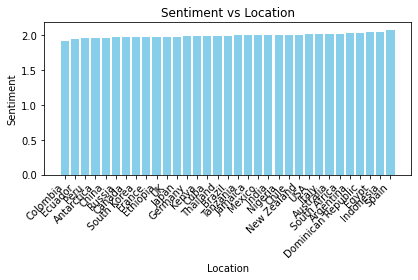

In [ ]:
def plot_bar_graph(locations_with_sentiments):
    """
    input: locations with sentiments is a dictionary with the keys being the locations and the values is the sentiment
    """
    locations_list = sorted(list(locations_with_sentiments.keys()))
    # sentiment_list = list(locations_with_sentiments.values())
    sentiment_list = list(locations_with_sentiments.values())

    # Plotting
    plt.bar(locations_list, sentiment_list, color='skyblue')
    plt.xlabel('Location')
    plt.ylabel('Sentiment')
    plt.title('Sentiment vs Location')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust layout to prevent clipping of labels
    plt.show()


# sorted_location_scores

plot_bar_graph(sorted_location_scores)

In [17]:
# only done for naive bayes so far
def averageSentimentByLocation(location):
    dataset = getLocationTweetsWithSentiment(result[0], location)
    train = dataset[:int(0.8*len(dataset))] # change this so that its actually a train test split 
    test = dataset[int(0.8*len(dataset)):]
    # naive bayes
    naive_bayes = NaiveBayesClassifier(train)
    total_sentiment = 0
    true_sentiment = 0
    for text, sentiment in test:
        pred = naive_bayes.classify(text)
        if sentiment == "pos":
            true_sentiment += 4
        if pred == "pos":
            total_sentiment += 4
        if pred == "neu":
            total_sentiment += 2
        # negative is still just value 0
    average_sentiment = total_sentiment/len(test)
    average_true = true_sentiment/len(test)
    print("average true sentiment ", average_true)
    return average_sentiment
    
# averageSentimentByLocation('China')

In [ ]:
import nltk
nltk.download(["names", "stopwords", "state_union", "twitter_samples", "movie_reviews", "averaged_perceptron_tagger", "vader_lexicon","punkt",])

[nltk_data] <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED]
[nltk_data]     certificate verify failed: unable to get local issuer
[nltk_data]     certificate (_ssl.c:997)>


False

In [ ]:
# SentimentIntensityAnalyzer (pre-trained)
def averageSentimentByLocation_sia(location):
    dataset = getLocationTweetsWithSentiment(result[0], location)
    test = dataset[int(0.8*len(dataset)):]
    sia = SentimentIntensityAnalyzer()
    total_sentiment = 0
    # using test so we can compare scores across models
    for text, _ in test:
        sia_pred = sia.polarity_scores(text)
        if sia_pred["compound"] > 0:
            total_sentiment += 4
        elif sia_pred["compound"] == 0:
            total_sentiment += 2
    average_sentiment = total_sentiment/len(dataset)
    return average_sentiment

averageSentimentByLocation_sia('China')
    

NameError: name 'getLocationTweetsWithSentiment' is not defined

In [18]:
# hugging face transformer model (pre-trained)
def averageSentimentByLocation_hf(location):
    dataset = getLocationTweetsWithSentiment(result[0], location)
    specific_model = pipeline(model="finiteautomata/bertweet-base-sentiment-analysis")
    # note: model can only take 204 or 128 items in dataset, so only using test
    data = [text for text, sentiment in test]
    results = specific_model(data)

    print(results)
    total_sentiment = 0
    for r in results:
        label = r['label'].lower()
        if label == 'pos':
            total_sentiment += 4
        if label == 'neu':
            total_sentiment += 2
    average_sentiment = total_sentiment/len(dataset)
    return average_sentiment

# averageSentimentByLocation_hf('China')

average true sentiment  2.0297520661157025


emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0


[{'label': 'POS', 'score': 0.7939398288726807}, {'label': 'NEG', 'score': 0.9811898469924927}, {'label': 'NEU', 'score': 0.8750095367431641}, {'label': 'NEG', 'score': 0.8485803604125977}, {'label': 'POS', 'score': 0.9832996726036072}, {'label': 'NEU', 'score': 0.7807251214981079}, {'label': 'POS', 'score': 0.9927762746810913}, {'label': 'NEG', 'score': 0.8045457005500793}, {'label': 'NEG', 'score': 0.6069175004959106}, {'label': 'NEG', 'score': 0.9811261296272278}, {'label': 'POS', 'score': 0.5244981646537781}, {'label': 'POS', 'score': 0.8377857804298401}, {'label': 'NEG', 'score': 0.8652767539024353}, {'label': 'POS', 'score': 0.9865532517433167}, {'label': 'POS', 'score': 0.9907287359237671}, {'label': 'POS', 'score': 0.9925392270088196}, {'label': 'NEU', 'score': 0.7213831543922424}, {'label': 'NEU', 'score': 0.6411733627319336}, {'label': 'NEG', 'score': 0.9432827830314636}, {'label': 'NEU', 'score': 0.7985765933990479}, {'label': 'POS', 'score': 0.9928164482116699}, {'label': 'P

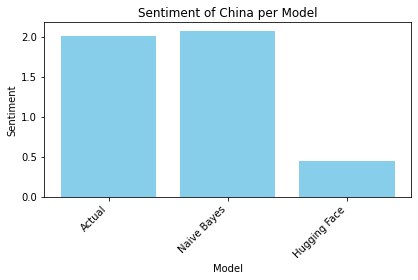

In [21]:
def plotBarGraph_locSent(location, original_sentiments):
    """
    input: location of interest
    """
    true_sentiment = original_sentiments[location]
    nb_sentiment = averageSentimentByLocation(location)
    # sia_sentiment = averageSentimentByLocation_sia(location)
    hf_sentiment = averageSentimentByLocation_hf(location)

    model_names = ["Actual", "Naive Bayes", "Hugging Face"] # add this in "Sentiment Intensity Analyzer"
    sentiment_values = [true_sentiment, nb_sentiment, hf_sentiment] # add this in sia_sentiment 
    # Plotting
    plt.bar(model_names, sentiment_values, color='skyblue')
    plt.xlabel('Model')
    plt.ylabel('Sentiment')
    plt.title(f'Average Sentiment of {location} tweets per Model')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust layout to prevent clipping of labels
    plt.show()

plotBarGraph_locSent("China", sorted_location_scores)

average true sentiment  1.9049180327868853


emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0


[{'label': 'POS', 'score': 0.7939398288726807}, {'label': 'NEG', 'score': 0.9811898469924927}, {'label': 'NEU', 'score': 0.8750095367431641}, {'label': 'NEG', 'score': 0.8485803604125977}, {'label': 'POS', 'score': 0.9832996726036072}, {'label': 'NEU', 'score': 0.7807251214981079}, {'label': 'POS', 'score': 0.9927762746810913}, {'label': 'NEG', 'score': 0.8045457005500793}, {'label': 'NEG', 'score': 0.6069175004959106}, {'label': 'NEG', 'score': 0.9811261296272278}, {'label': 'POS', 'score': 0.5244981646537781}, {'label': 'POS', 'score': 0.8377857804298401}, {'label': 'NEG', 'score': 0.8652767539024353}, {'label': 'POS', 'score': 0.9865532517433167}, {'label': 'POS', 'score': 0.9907287359237671}, {'label': 'POS', 'score': 0.9925392270088196}, {'label': 'NEU', 'score': 0.7213831543922424}, {'label': 'NEU', 'score': 0.6411733627319336}, {'label': 'NEG', 'score': 0.9432827830314636}, {'label': 'NEU', 'score': 0.7985765933990479}, {'label': 'POS', 'score': 0.9928164482116699}, {'label': 'P

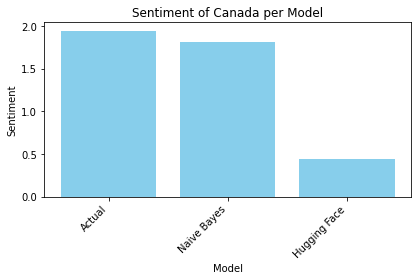

In [22]:
plotBarGraph_locSent("Canada", sorted_location_scores)

average true sentiment  2.0048979591836735


emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0


[{'label': 'POS', 'score': 0.7939398288726807}, {'label': 'NEG', 'score': 0.9811898469924927}, {'label': 'NEU', 'score': 0.8750095367431641}, {'label': 'NEG', 'score': 0.8485803604125977}, {'label': 'POS', 'score': 0.9832996726036072}, {'label': 'NEU', 'score': 0.7807251214981079}, {'label': 'POS', 'score': 0.9927762746810913}, {'label': 'NEG', 'score': 0.8045457005500793}, {'label': 'NEG', 'score': 0.6069175004959106}, {'label': 'NEG', 'score': 0.9811261296272278}, {'label': 'POS', 'score': 0.5244981646537781}, {'label': 'POS', 'score': 0.8377857804298401}, {'label': 'NEG', 'score': 0.8652767539024353}, {'label': 'POS', 'score': 0.9865532517433167}, {'label': 'POS', 'score': 0.9907287359237671}, {'label': 'POS', 'score': 0.9925392270088196}, {'label': 'NEU', 'score': 0.7213831543922424}, {'label': 'NEU', 'score': 0.6411733627319336}, {'label': 'NEG', 'score': 0.9432827830314636}, {'label': 'NEU', 'score': 0.7985765933990479}, {'label': 'POS', 'score': 0.9928164482116699}, {'label': 'P

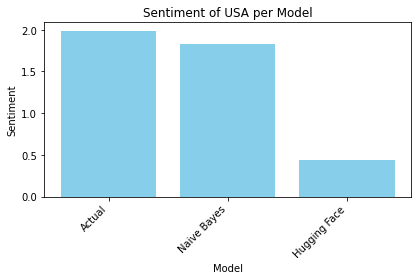

In [23]:
plotBarGraph_locSent("USA", sorted_location_scores)

average true sentiment  2.1164725457570714


emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0


[{'label': 'POS', 'score': 0.7939398288726807}, {'label': 'NEG', 'score': 0.9811898469924927}, {'label': 'NEU', 'score': 0.8750095367431641}, {'label': 'NEG', 'score': 0.8485803604125977}, {'label': 'POS', 'score': 0.9832996726036072}, {'label': 'NEU', 'score': 0.7807251214981079}, {'label': 'POS', 'score': 0.9927762746810913}, {'label': 'NEG', 'score': 0.8045457005500793}, {'label': 'NEG', 'score': 0.6069175004959106}, {'label': 'NEG', 'score': 0.9811261296272278}, {'label': 'POS', 'score': 0.5244981646537781}, {'label': 'POS', 'score': 0.8377857804298401}, {'label': 'NEG', 'score': 0.8652767539024353}, {'label': 'POS', 'score': 0.9865532517433167}, {'label': 'POS', 'score': 0.9907287359237671}, {'label': 'POS', 'score': 0.9925392270088196}, {'label': 'NEU', 'score': 0.7213831543922424}, {'label': 'NEU', 'score': 0.6411733627319336}, {'label': 'NEG', 'score': 0.9432827830314636}, {'label': 'NEU', 'score': 0.7985765933990479}, {'label': 'POS', 'score': 0.9928164482116699}, {'label': 'P

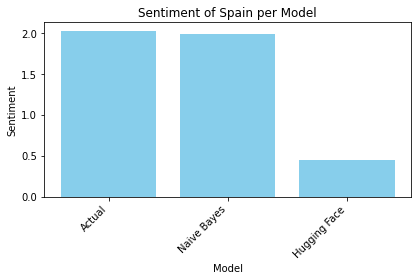

In [24]:
plotBarGraph_locSent("Spain", sorted_location_scores)